# Cross-correlation

In [2]:
from typing import Sequence

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

import rpy2

In [3]:
%load_ext rpy2.ipython

In [4]:
def cross_correlation(y1: Sequence[float], y2: Sequence[float]) -> Sequence[float]:
    '''
        Measures cross-correlation between two 1-D 
        vectors of equal length.
        
        Inputs
        ......
            x: 1-D np.array of floats
            y: 1-D np.array of floats
            
        Outputs
        -------
            ccorr: 1-D np.array of floats
    '''
    assert len(y1) == len(y2)

    n = len(y1)
    ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
    ccorr = ccov / (n * y1.std() * y2.std())
    return ccorr

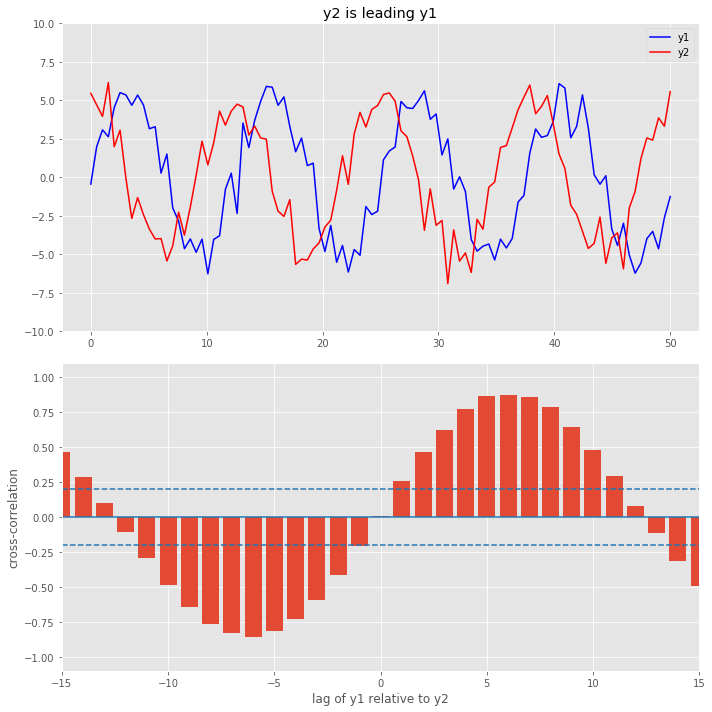

In [21]:
n = 100
x = np.linspace(0, 50, n)
y1 = 5 * np.sin(x / 2) + np.random.randn(n)
y2 = 5 * np.cos(x / 2) + np.random.randn(n)
lags = np.arange(-n + 1, n)
ccorr = cross_correlation(y1, y2)

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(10, 10), nrows=2)

    ax[0].plot(x, y1, 'b', label='y1')
    ax[0].plot(x, y2, 'r', label='y2')
    ax[0].set_ylim(-10, 10)
    ax[0].set_title('y2 is leading y1')
    ax[0].legend(loc='best')

    ax[1].bar(lags, ccorr)
    ax[1].set_ylim(-1.1, 1.1)
    ax[1].set_xlim(-15, 15)
    ax[1].axhline(-2 / np.sqrt(n), linestyle='--')
    ax[1].axhline(0)
    ax[1].axhline(2 / np.sqrt(n), linestyle='--')
    ax[1].set_xlabel('lag of y1 relative to y2')
    ax[1].set_ylabel('cross-correlation')

    plt.tight_layout()


Autocorrelations of series ‘X’, by lag

   -16    -15    -14    -13    -12    -11    -10     -9     -8     -7     -6 
 0.583  0.460  0.287  0.102 -0.112 -0.296 -0.490 -0.646 -0.765 -0.830 -0.859 
    -5     -4     -3     -2     -1      0      1      2      3      4      5 
-0.817 -0.731 -0.593 -0.413 -0.207  0.008  0.257  0.461  0.623  0.772  0.861 
     6      7      8      9     10     11     12     13     14     15     16 
 0.872  0.853  0.780  0.644  0.474  0.290  0.078 -0.115 -0.316 -0.494 -0.624 


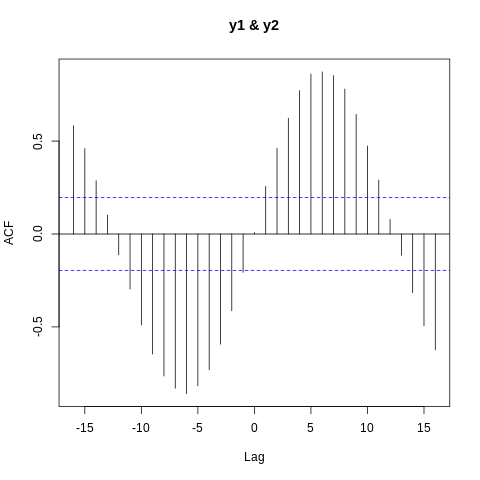

In [23]:
%%R -i y1,y2

result = ccf(y1, y2)
result